Task 1 (2p.): Provide a similar analysis (EDA) for two additional networks as presented in the tutorial
(Facebook dataset and networx library).
The analysis can be limited but with should contain at least the:
- Basic statistics (no of edges, no of nodes, degree distribution)
- One or more visualizations
- Shortest-paths analysis
- Analysis of two or more centrality measures (e.g. PageRank)

In [30]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

## Loading congress twitter data

In [48]:
congress = pd.read_csv(
    'congress.edgelist',
    delimiter=' ',
    names=['source', 'target'],
    usecols=[0, 1]  # specify the columns to read
)
congress


,source,target
0,0,4
1,0,12
2,0,18
3,0,25
4,0,30
...,...,...
13284,456,435
13285,456,442
13286,456,449
13287,456,453


In [49]:
G = nx.from_pandas_edgelist(congress, 'source', 'target')

<!-- Task 1 (2p.): Provide a similar analysis (EDA) for two additional networks as presented in the tutorial
(Facebook dataset and networx library).
The analysis can be limited but with should contain at least the:
- Basic statistics (no of edges, no of nodes, degree distribution)
- One or more visualizations
- Shortest-paths analysis
- Analysis of two or more centrality measures (e.g. PageRank) -->

## Visualizing the network

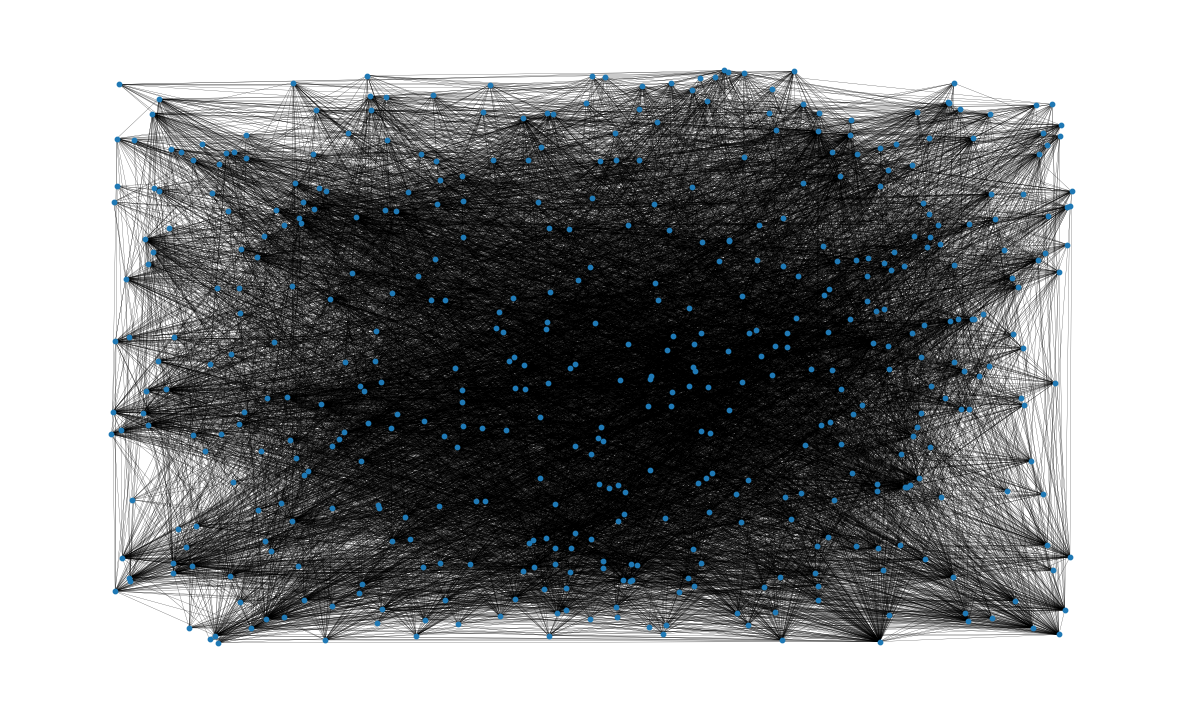

In [50]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

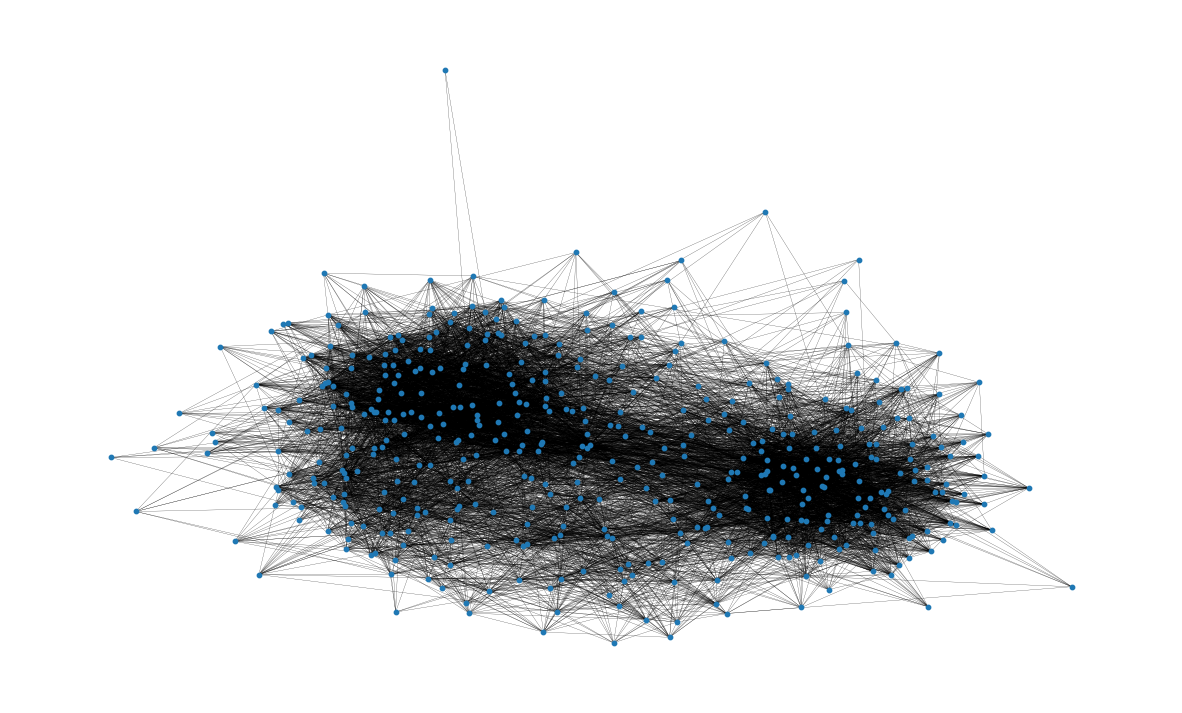

In [51]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

## Basic statistics

In [52]:
G.number_of_nodes()

475

In [53]:
G.number_of_edges()

10222

In [54]:
degrees = [d for _, d in G.degree()]

### degree distribution

In [55]:
print(f"""
Mean degree: {np.mean(degrees)}
Median degree: {np.median(degrees)}
Max degree: {np.max(degrees)}
Min degree: {np.min(degrees)}
""")


Mean degree: 43.04
Median degree: 38.0
Max degree: 214
Min degree: 2



## Shortest-paths analysis

In [56]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
shortest_path_lengths[0][37]

2

In [57]:
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

4

In [58]:
# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

2.059541274238227

Text(0, 0.5, 'Frequency (%)')

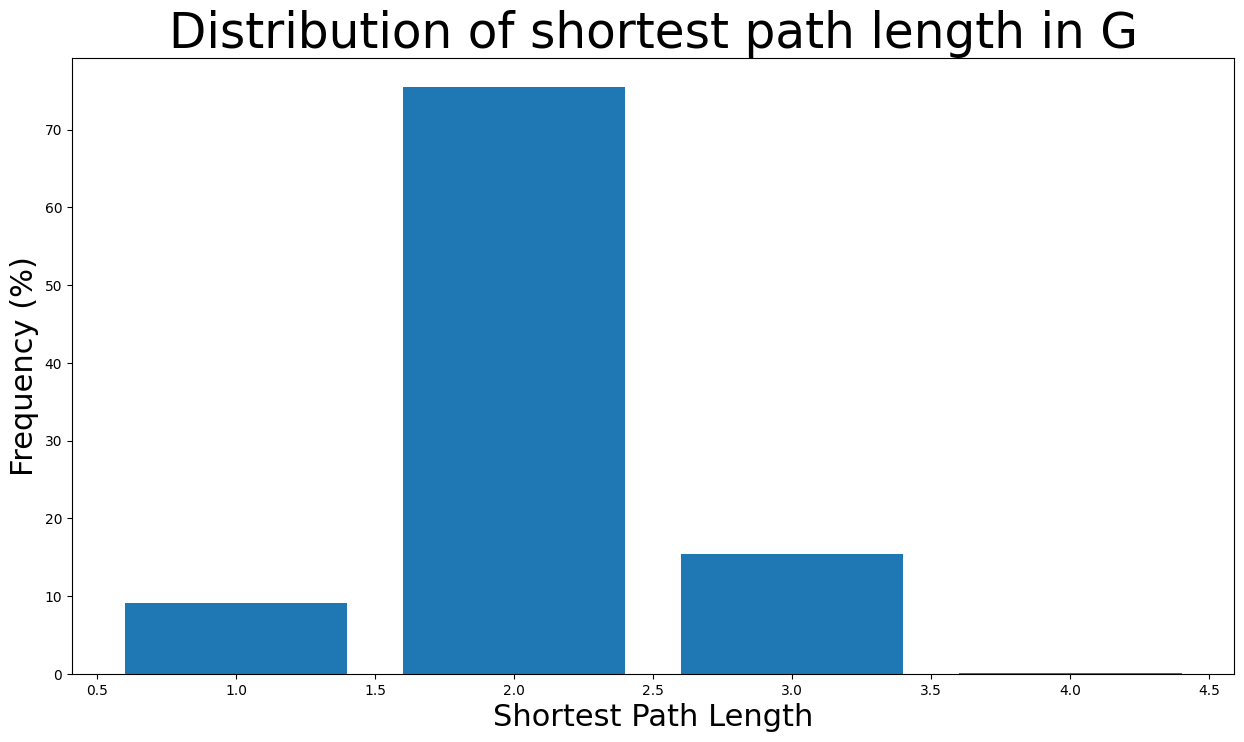

In [59]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", fontdict={"size": 35}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})

In [60]:
nx.density(G)

0.09080168776371308

In [61]:
nx.number_connected_components(G)

1

## Analysis of two or more centrality measures

### Degree Centrality

In [62]:
degree_centrality = nx.centrality.degree_centrality(
    G
)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(367, 0.45147679324894513),
 (322, 0.38185654008438813),
 (254, 0.2995780590717299),
 (208, 0.28270042194092826),
 (393, 0.27215189873417717),
 (190, 0.2679324894514768),
 (111, 0.2531645569620253),
 (192, 0.23839662447257381)]

Text(0, 0.5, 'Counts')

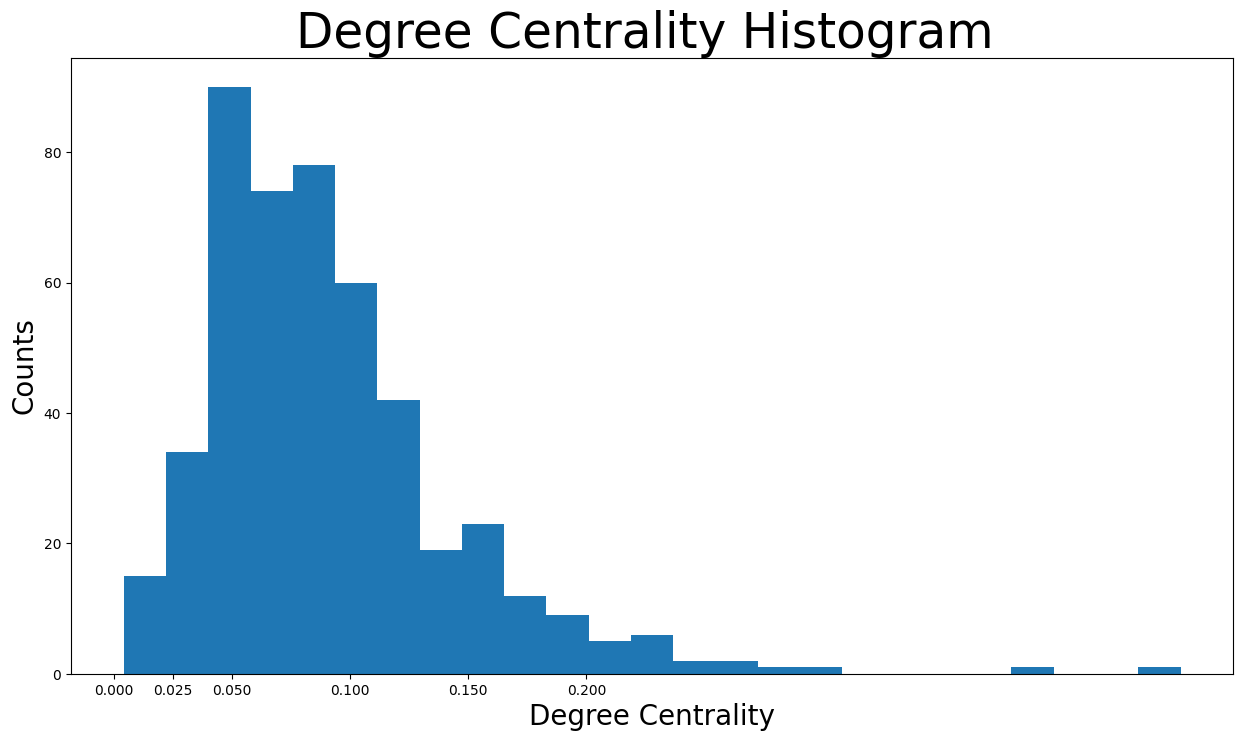

In [63]:
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.8164652200089408,
 0.7934248289908731,
 -0.6630337628837303,
 1.1580258326722097)

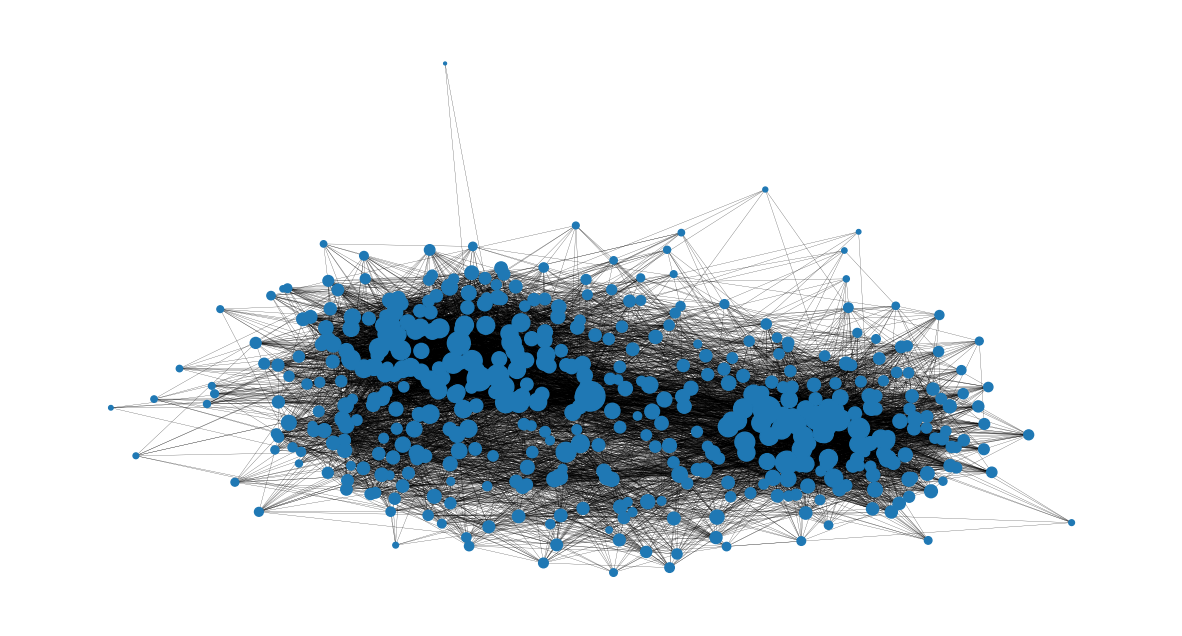

In [64]:
node_size = [
    v * 1000 for v in degree_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

### Betweenness Centrality

In [65]:
betweenness_centrality = nx.centrality.betweenness_centrality(
    G
)  # save results in a variable to use again
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(367, 0.06862644524670267),
 (322, 0.03718289232722759),
 (254, 0.022622535590667927),
 (208, 0.01545860745624782),
 (17, 0.014895064503188359),
 (71, 0.01377085766816814),
 (393, 0.013559463845965472),
 (461, 0.013285379463926878)]

Text(0, 0.5, 'Counts')

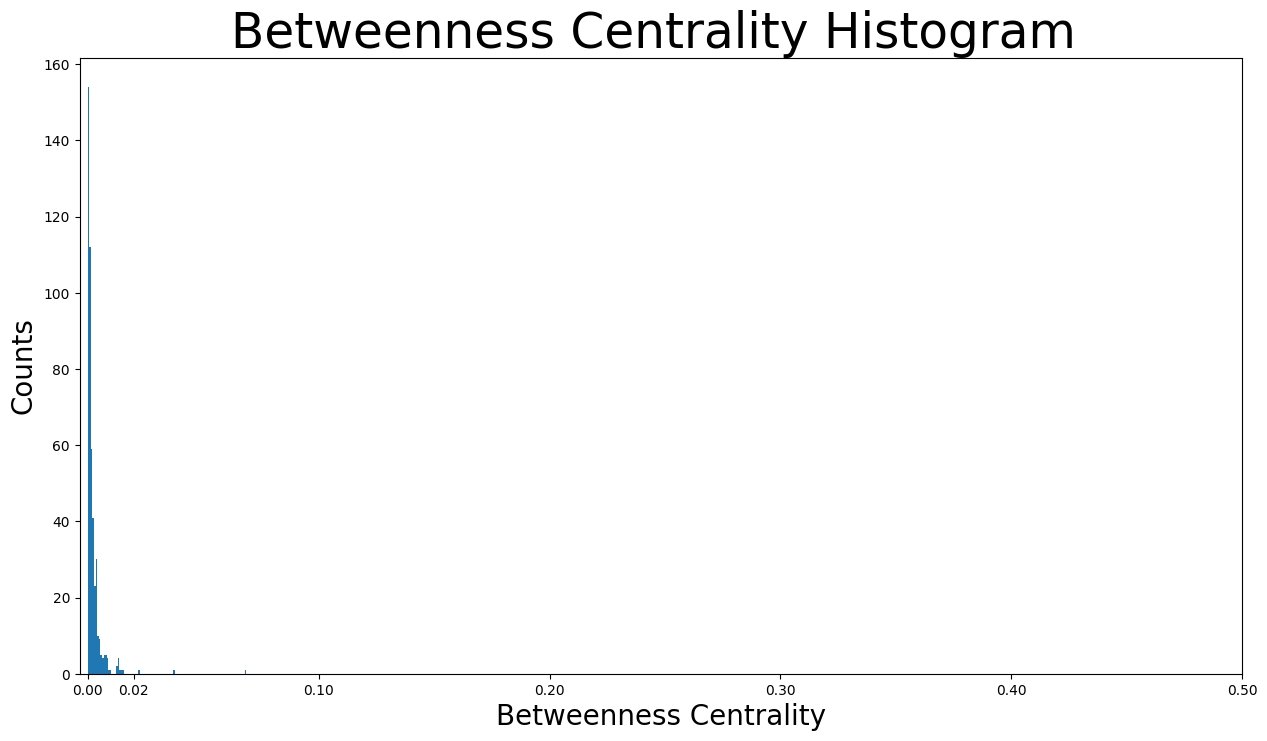

In [66]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

(-0.8164652200089408,
 0.7934248289908731,
 -0.6630337628837303,
 1.1580258326722097)

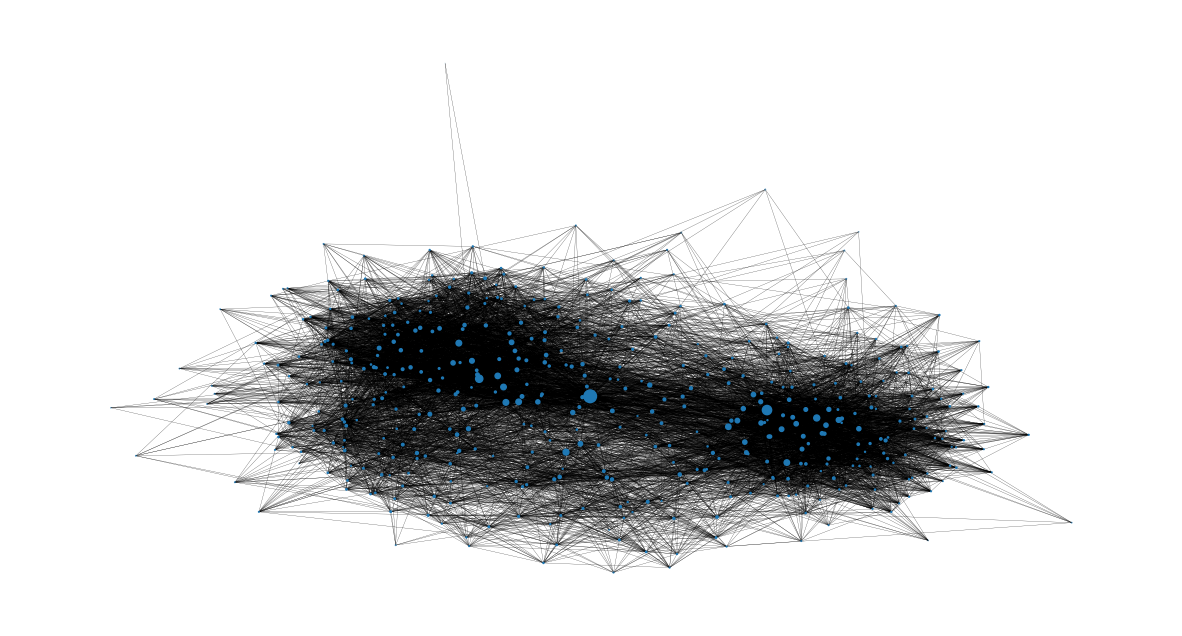

In [67]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")